In [1]:
# 📌 Step 1: Install yfinance (Only needed in Colab)
!pip install yfinance

# 📌 Step 2: Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Display plots inline
%matplotlib inline

In [2]:
# 📌 Step 3: Load Historical Data for a Stock (e.g., Tesla)
ticker = 'TSLA'  # You can change this to 'AAPL', 'MSFT', etc.
df = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# Display first few rows
df.head()


/tmp/ipython-input-3214371046.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [3]:
# 📌 Step 4: Feature Engineering

# Create target column: next day's Close price
df['Target'] = df['Close'].shift(-1)

# Drop the last row since Target will be NaN
df.dropna(inplace=True)

# Features and Target
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Target']


In [4]:
# 📌 Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [5]:
# 📌 Step 6: Train Models

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [6]:
# 📌 Step 7: Evaluate Models

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🔍 {model_name} Performance:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_true, y_pred))

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")



🔍 Linear Regression Performance:
R² Score: 0.9545074916996437
Mean Squared Error: 55.56188044629976

🔍 Random Forest Regressor Performance:
R² Score: 0.9318902843947171
Mean Squared Error: 83.18521042425273


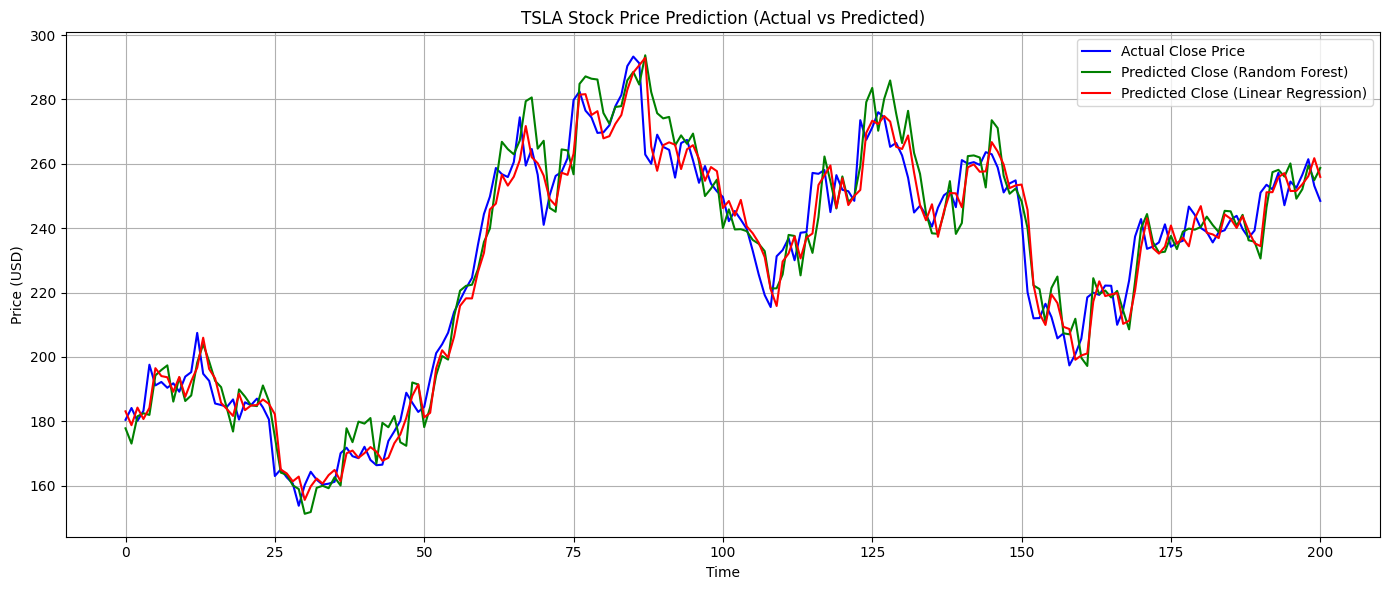

In [7]:
# 📌 Step 8: Plot Actual vs Predicted Closing Prices

plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_pred_rf, label='Predicted Close (Random Forest)', color='green')
plt.plot(y_pred_lr, label='Predicted Close (Linear Regression)', color='red')
plt.title(f"{ticker} Stock Price Prediction (Actual vs Predicted)")
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
